### MNIST MultiClass Classification

Handwritten digit recognition 0-9 using multiclass classification

In [18]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, softmax
%matplotlib widget
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

from public_tests import * 

from autils import *
from lab_utils_softmax import plt_softmax
np.set_printoptions(precision=2)

### Loading dataset

In [19]:
X, y = load_data()

In [20]:
print("First few elements of X: ",X[0])

First few elements of X:  [ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  8.56e-06  1.94e-06 -7.37e-04
 -8.13e-03 -1.86e-02 -1.87e-02 -1.88e-02 -1.91e-02 -1.64e-02 -3.78e-03
  3.30e-04  1.28e-05  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  1.16e-04  1.20e-04 -1.40e-02 -2.85e-02  8.04e-02
  2.67e-01  2.74e-01  2.79e-01  2.74e-01  2.25e-01 

In [21]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (5000, 400)
Shape of y: (5000, 1)


In [22]:
print("First element of y:",y[0])
print("Last element of y:",y[4999])

First element of y: [0]
Last element of y: [9]


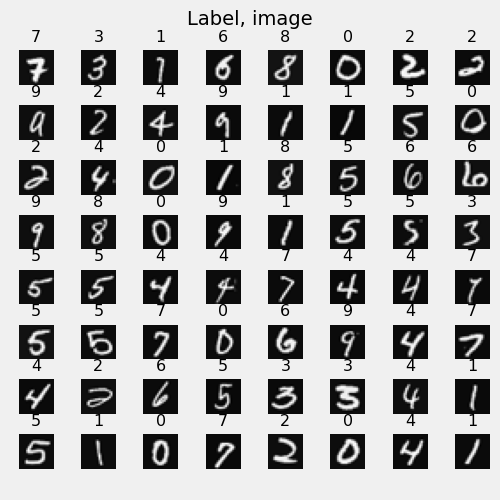

In [23]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

#fig.tight_layout(pad=0.5)
widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)

### Model Architecture

NN will have 3 dense layers, first layer will have 25 units, second layer 15 units, third layer will have 10 units based on the number of digits used

In [39]:
tf.random.set_seed(1234)
model = Sequential([
    tf.keras.Input(shape=400),
    Dense(units=25, activation ='relu', name="L1"), 
    Dense(units=15, activation = 'relu', name="L2"),
    Dense(units=10, activation = 'linear', name="L3")
])

In [40]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 25)                10025     
                                                                 
 L2 (Dense)                  (None, 15)                390       
                                                                 
 L3 (Dense)                  (None, 10)                160       
                                                                 
Total params: 10575 (41.31 KB)
Trainable params: 10575 (41.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
test_model(model,10,400)

All tests passed!


### Compiling Model

In [72]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.legacy.Adam(0.01)
    
)

model.fit(X, y, epochs=40)

Epoch 1/40
157/157 [==============================] - 1s 4ms/step - loss: 0.0664
Epoch 2/40
157/157 [==============================] - 0s 3ms/step - loss: 0.0435
Epoch 3/40
157/157 [==============================] - 0s 2ms/step - loss: 0.0200
Epoch 4/40
157/157 [==============================] - 0s 2ms/step - loss: 0.0239
Epoch 5/40
157/157 [==============================] - 0s 3ms/step - loss: 0.0222
Epoch 6/40
157/157 [==============================] - 0s 2ms/step - loss: 0.0426
Epoch 7/40
157/157 [==============================] - 0s 3ms/step - loss: 0.1188
Epoch 8/40
157/157 [==============================] - 0s 3ms/step - loss: 0.0676
Epoch 9/40
157/157 [==============================] - 0s 3ms/step - loss: 0.0171
Epoch 10/40
157/157 [==============================] - 0s 3ms/step - loss: 0.0204
Epoch 11/40
157/157 [==============================] - 0s 3ms/step - loss: 0.0203
Epoch 12/40
157/157 [==============================] - 0s 3ms/step - loss: 0.0149
Epoch 13/40
157/157 [====

### Inference

In [73]:
#logits = model(X)
#f_x = tf.nn.softmax(logits) # if desired outputs are probabilities

In [74]:
for i in range(1,5000,500):
    prediction = model.predict(X[i].reshape(1,400))
    print(f"Model prediction of two:{prediction}")
    print(f"Largest predicted value: {np.argmax(prediction)}")

1/1 [==============================] - 0s 39ms/step
Model prediction of two:[[ 32.08 -44.63  -5.7  -16.79 -33.55 -10.15 -20.34 -27.63 -26.27  -1.76]]
Largest predicted value: 0
1/1 [==============================] - 0s 17ms/step
Model prediction of two:[[-59.46  33.82 -12.43  -6.55  -5.24 -30.   -38.48 -37.23  -5.02 -23.4 ]]
Largest predicted value: 1
1/1 [==============================] - 0s 17ms/step
Model prediction of two:[[-34.1   -3.4   26.95  14.96 -45.86 -29.48 -40.52   8.18 -13.37 -34.35]]
Largest predicted value: 2
1/1 [==============================] - 0s 16ms/step
Model prediction of two:[[-55.17 -39.68 -53.97  38.66 -50.49  -5.65 -99.7  -19.28 -43.14 -11.34]]
Largest predicted value: 3
1/1 [==============================] - 0s 16ms/step
Model prediction of two:[[-19.54 -31.8    1.71 -44.37  34.8  -11.4    1.42 -21.81  -7.81   9.41]]
Largest predicted value: 4
1/1 [==============================] - 0s 16ms/step
Model prediction of two:[[-81.65  13.16 -37.46   2.56 -75.3   6

In [75]:
for i in range(1,5000, 500):
    prediction=model.predict(X[i].reshape(1,400))
    prediction_prob=tf.nn.softmax(prediction)
    print(f"Predictions for each digit: {prediction_prob}, category={np.argmax(prediction_prob)}")

1/1 [==============================] - 0s 17ms/step
Predictions for each digit: [[1.00e+00 4.87e-34 3.92e-17 5.95e-22 3.14e-29 4.57e-19 1.72e-23 1.17e-26
  4.59e-26 2.01e-15]], category=0
1/1 [==============================] - 0s 16ms/step
Predictions for each digit: [[0.00e+00 1.00e+00 8.21e-21 2.94e-18 1.08e-17 1.92e-28 3.99e-32 1.39e-31
  1.35e-17 1.41e-25]], category=1
1/1 [==============================] - 0s 17ms/step
Predictions for each digit: [[3.08e-27 6.59e-14 1.00e+00 6.19e-06 2.41e-32 3.12e-25 5.00e-30 7.08e-09
  3.09e-18 2.38e-27]], category=2
1/1 [==============================] - 0s 17ms/step
Predictions for each digit: [[0.00e+00 9.55e-35 0.00e+00 1.00e+00 0.00e+00 5.73e-20 0.00e+00 6.85e-26
  2.98e-36 1.92e-22]], category=3
1/1 [==============================] - 0s 16ms/step
Predictions for each digit: [[2.50e-24 1.18e-29 4.25e-15 4.15e-35 1.00e+00 8.58e-21 3.19e-15 2.58e-25
  3.11e-19 9.34e-12]], category=4
1/1 [==============================] - 0s 17ms/step
Predicti

In [58]:
#prediction_p = tf.nn.softmax(prediction)
#print(f"Predicting a two, probability: {prediction_p}")
#print(f"Total predictions: {np.sum(prediction_p)}")

Predicting a two, probability: [[1.38e-21 4.38e-11 1.00e+00 1.79e-06 1.90e-22 6.47e-20 8.00e-25 7.01e-06
  1.02e-15 2.29e-25]]
Total predictions: 1.0


In [62]:
#print(f"{prediction_p}, category={np.argmax(prediction_p)}")

[[1.38e-21 4.38e-11 1.00e+00 1.79e-06 1.90e-22 6.47e-20 8.00e-25 7.01e-06
  1.02e-15 2.29e-25]], category=2


### Predictions vs Target value

1/1 [==============================] - 0s 13ms/step


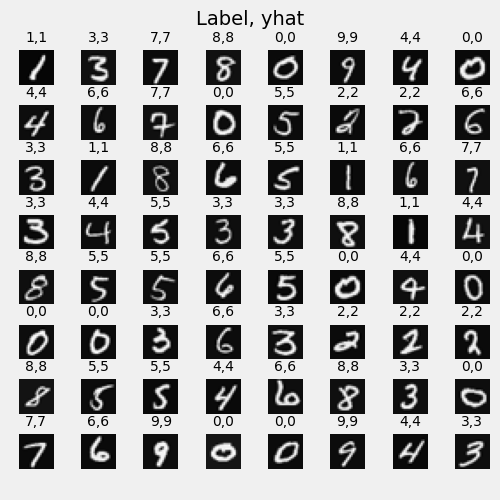

In [76]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]
widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1,400))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()

In [77]:
print(f"{display_errors(model, X, y)} errors out of {len(X)} images")

157/157 [==============================] - 0s 2ms/step
no errors found
0 errors out of 5000 images


In [1]:
#might be overfitting, split dataset, implement regularizaation